In [2]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [7]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_9_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [8]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_9_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 2s - loss: 0.3303 - accuracy: 0.8643 - val_loss: 0.2701 - val_accuracy: 0.8879
Epoch 2/100
100000/100000 - 1s - loss: 0.2536 - accuracy: 0.8928 - val_loss: 0.2440 - val_accuracy: 0.8949
Epoch 3/100
100000/100000 - 1s - loss: 0.2289 - accuracy: 0.9010 - val_loss: 0.2248 - val_accuracy: 0.9031
Epoch 4/100
100000/100000 - 1s - loss: 0.2037 - accuracy: 0.9107 - val_loss: 0.1976 - val_accuracy: 0.9107
Epoch 5/100
100000/100000 - 1s - loss: 0.1790 - accuracy: 0.9187 - val_loss: 0.1712 - val_accuracy: 0.9200
Epoch 6/100
100000/100000 - 1s - loss: 0.1586 - accuracy: 0.9263 - val_loss: 0.1590 - val_accuracy: 0.9246
Epoch 7/100
100000/100000 - 1s - loss: 0.1430 - accuracy: 0.9334 - val_loss: 0.1406 - val_accuracy: 0.9338
Epoch 8/100
100000/100000 - 1s - loss: 0.1302 - accuracy: 0.9399 - val_loss: 0.1336 - val_accuracy: 0.9384
Epoch 9/100
100000/100000 - 1s - loss: 0.1207 - accuracy: 0.9448 - val_loss: 0.1229 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0157 - accuracy: 0.9943 - val_loss: 0.0403 - val_accuracy: 0.9876
Epoch 78/100
100000/100000 - 1s - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.0404 - val_accuracy: 0.9879
Epoch 79/100
100000/100000 - 1s - loss: 0.0172 - accuracy: 0.9938 - val_loss: 0.0416 - val_accuracy: 0.9882
Epoch 80/100
100000/100000 - 1s - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 81/100
100000/100000 - 1s - loss: 0.0185 - accuracy: 0.9933 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 82/100
100000/100000 - 1s - loss: 0.0164 - accuracy: 0.9941 - val_loss: 0.0386 - val_accuracy: 0.9879
Epoch 83/100
100000/100000 - 1s - loss: 0.0152 - accuracy: 0.9944 - val_loss: 0.0375 - val_accuracy: 0.9896
Epoch 84/100
100000/100000 - 1s - loss: 0.0146 - accuracy: 0.9947 - val_loss: 0.0406 - val_accuracy: 0.9884
Epoch 85/100
100000/100000 - 1s - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.0434 - val_accuracy: 0.9876
Epoch 86/100
100000/100000 -

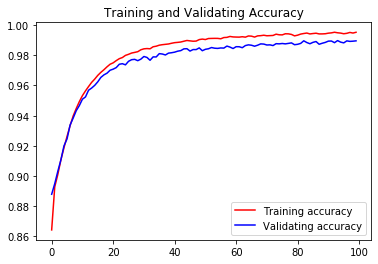

In [11]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [12]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_9_2_model.h5')